In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers

In [31]:
df = pd.read_csv('heart.csv')
df.head()
y = df['target'].iloc[2:]
X = df.drop(df['target'])
print(df.shape, X.shape, y.shape)

(1025, 14) (1023, 14) (1023,)


In [16]:
print("Number of data rows: ",len(df))

Number of data rows:  1025


In [17]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [18]:
df = df.dropna()

In [19]:
print("After removing rows with null values: ",len(df))

After removing rows with null values:  1025


In [20]:
print("Number of classes:")
df["target"].value_counts()

Number of classes:


1    526
0    499
Name: target, dtype: int64

Plotting a bar chart for comparison:


<Axes: >

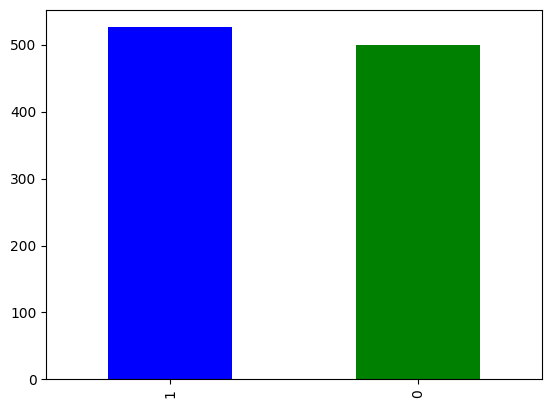

In [21]:
print("Plotting a bar chart for comparison:")
df["target"].value_counts().plot(kind='bar', color=["blue","green"])

In [32]:
print("Correlation Matrix:")
df.corr()

Correlation Matrix:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


In [33]:
# Separate the target variable from the features
X = df.drop(['target', 'fbs'], axis=1)  # Exclude the 'target' and 'fbs' columns
y = df['target']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the feature data
X_scaled = scaler.fit_transform(X)

# Create a DataFrame with the scaled features
scaled_df = pd.DataFrame(data=X_scaled, columns=X.columns)

# Add the target variable back to the DataFrame
scaled_df['target'] = y


In [35]:
scaled_df.head()

,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.268437,0.661504,-0.915755,-0.377636,-0.659332,0.891255,0.821321,-0.712287,-0.060888,0.995433,1.209221,1.089852,0
1,-0.158157,0.661504,-0.915755,0.479107,-0.833861,-1.004049,0.255968,1.403928,1.727137,-2.243675,-0.731971,1.089852,0
2,1.716595,0.661504,-0.915755,0.764688,-1.396233,0.891255,-1.048692,1.403928,1.301417,-2.243675,-0.731971,1.089852,0
3,0.724079,0.661504,-0.915755,0.936037,-0.833861,0.891255,0.516900,-0.712287,-0.912329,0.995433,0.238625,1.089852,0
4,0.834359,-1.511706,-0.915755,0.364875,0.930822,0.891255,-1.874977,-0.712287,0.705408,-0.624121,2.179817,-0.522122,0


In [36]:
df=scaled_df

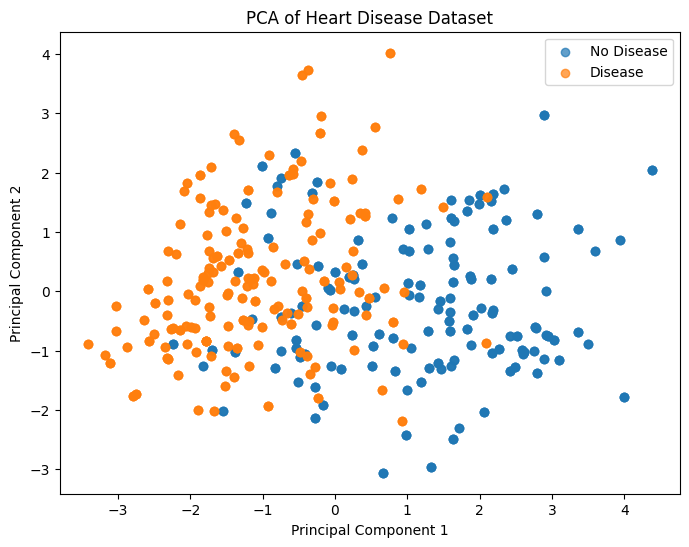

In [37]:
# Separate the target variable from the features
X = df.drop('target', axis=1)
y = df['target']

# Standardize the features (important for PCA)
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Create a PCA object and specify the number of components you want to keep
n_components = 2  # You can choose the number of components
pca = PCA(n_components=n_components)

# Fit and transform the data
X_pca = pca.fit_transform(X_std)

# Create a new DataFrame with the principal components
principal_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

# Add the target variable back to the DataFrame
principal_df['target'] = y

# Plot the PCA results
plt.figure(figsize=(8, 6))
plt.scatter(principal_df.loc[principal_df['target'] == 0, 'PC1'], principal_df.loc[principal_df['target'] == 0, 'PC2'], label='No Disease', alpha=0.7)
plt.scatter(principal_df.loc[principal_df['target'] == 1, 'PC1'], principal_df.loc[principal_df['target'] == 1, 'PC2'], label='Disease', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.title('PCA of Heart Disease Dataset')
plt.show()
